In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#hold the city data
city_data = []

In [10]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | llandrindod wells
Processing Record 3 of Set 1 | dubbo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | marawi
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | tlaltenango
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | solnechnyy
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | aberdeen
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | oktyabrskoye
Processing Record 19 of Set 1 | atar
Processing Record 20 of Set 1 | sola
Processing Record 21 of Set 1 | emerald
P

Processing Record 33 of Set 4 | nyrob
Processing Record 34 of Set 4 | puerto ayora
Processing Record 35 of Set 4 | tuatapere
Processing Record 36 of Set 4 | grindavik
Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | maryville
Processing Record 39 of Set 4 | yellowknife
Processing Record 40 of Set 4 | constitucion
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | dzhebariki-khaya
Processing Record 43 of Set 4 | mayumba
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | luanda
Processing Record 46 of Set 4 | tecoanapa
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | ekpoma
Processing Record 49 of Set 4 | valley city
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | kabalo
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | qaanaaq
Processing Record 5 of Set 5 | alashtar
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 26 of Set 8 | brigantine
Processing Record 27 of Set 8 | sampit
Processing Record 28 of Set 8 | puerto del rosario
Processing Record 29 of Set 8 | hearst
Processing Record 30 of Set 8 | mecca
Processing Record 31 of Set 8 | portland
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | palmares do sul
Processing Record 34 of Set 8 | muzaffarnagar
Processing Record 35 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | leningradskiy
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | wilmington
Processing Record 40 of Set 8 | keningau
Processing Record 41 of Set 8 | songjianghe
Processing Record 42 of Set 8 | talnakh
Processing Record 43 of Set 8 | atherton
Processing Record 44 of Set 8 | opuwo
Processing Record 45 of Set 8 | bogalusa
Processing Record 46 of Set 8 | port lincoln
Processing Record 47 of Set 8 | maniitsoq
Processing Record

Processing Record 13 of Set 12 | swadlincote
Processing Record 14 of Set 12 | hays
Processing Record 15 of Set 12 | christchurch
Processing Record 16 of Set 12 | korla
Processing Record 17 of Set 12 | goroka
Processing Record 18 of Set 12 | penzance
Processing Record 19 of Set 12 | moose factory
Processing Record 20 of Set 12 | mount gambier
Processing Record 21 of Set 12 | kruisfontein
Processing Record 22 of Set 12 | preobrazheniye
Processing Record 23 of Set 12 | kingaroy
Processing Record 24 of Set 12 | kimberley
Processing Record 25 of Set 12 | vardo
Processing Record 26 of Set 12 | hambantota
Processing Record 27 of Set 12 | itarema
Processing Record 28 of Set 12 | skelleftea
Processing Record 29 of Set 12 | uyskoye
Processing Record 30 of Set 12 | athabasca
Processing Record 31 of Set 12 | plouzane
Processing Record 32 of Set 12 | batouri
Processing Record 33 of Set 12 | faya
Processing Record 34 of Set 12 | saint-denis
Processing Record 35 of Set 12 | tambul
City not found. Ski

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.16,74,95,16.37,KI,2022-11-19 16:07:54
1,Llandrindod Wells,52.2416,-3.3787,43.95,85,100,4.47,GB,2022-11-19 16:07:54
2,Dubbo,-32.2500,148.6167,71.73,56,75,11.50,AU,2022-11-19 16:07:55
3,Ushuaia,-54.8000,-68.3000,56.82,44,40,17.27,AR,2022-11-19 16:03:37
4,Marawi,7.9986,124.2928,69.22,95,100,2.28,PH,2022-11-19 16:07:55
5,Sao Joao Da Barra,-21.6403,-41.0511,75.87,57,82,10.40,BR,2022-11-19 16:07:56
6,Rikitea,-23.1203,-134.9692,70.18,70,100,12.08,PF,2022-11-19 16:07:57
7,Tlaltenango,19.1667,-98.3333,63.10,55,40,4.61,MX,2022-11-19 16:07:57
8,New Norfolk,-42.7826,147.0587,56.70,88,100,1.28,AU,2022-11-19 16:07:57
9,Punta Arenas,-53.1500,-70.9167,50.11,62,20,34.52,CL,2022-11-19 16:07:58


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-11-19 16:07:54,3.0707,172.7902,81.16,74,95,16.37
1,Llandrindod Wells,GB,2022-11-19 16:07:54,52.2416,-3.3787,43.95,85,100,4.47
2,Dubbo,AU,2022-11-19 16:07:55,-32.2500,148.6167,71.73,56,75,11.50
3,Ushuaia,AR,2022-11-19 16:03:37,-54.8000,-68.3000,56.82,44,40,17.27
4,Marawi,PH,2022-11-19 16:07:55,7.9986,124.2928,69.22,95,100,2.28
5,Sao Joao Da Barra,BR,2022-11-19 16:07:56,-21.6403,-41.0511,75.87,57,82,10.40
6,Rikitea,PF,2022-11-19 16:07:57,-23.1203,-134.9692,70.18,70,100,12.08
7,Tlaltenango,MX,2022-11-19 16:07:57,19.1667,-98.3333,63.10,55,40,4.61
8,New Norfolk,AU,2022-11-19 16:07:57,-42.7826,147.0587,56.70,88,100,1.28
9,Punta Arenas,CL,2022-11-19 16:07:58,-53.1500,-70.9167,50.11,62,20,34.52


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

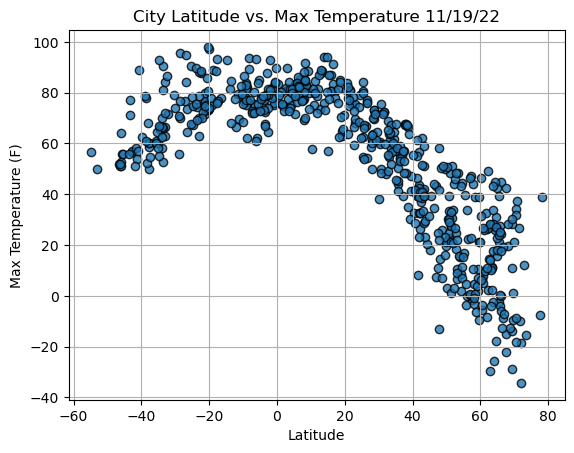

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

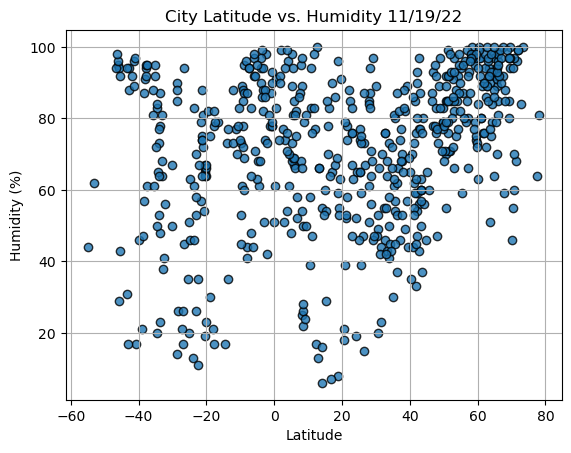

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

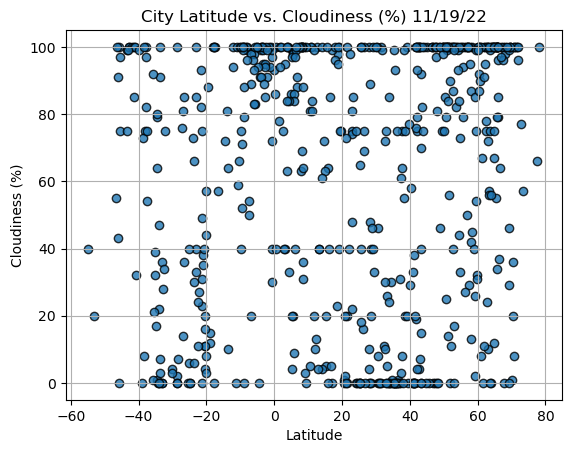

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

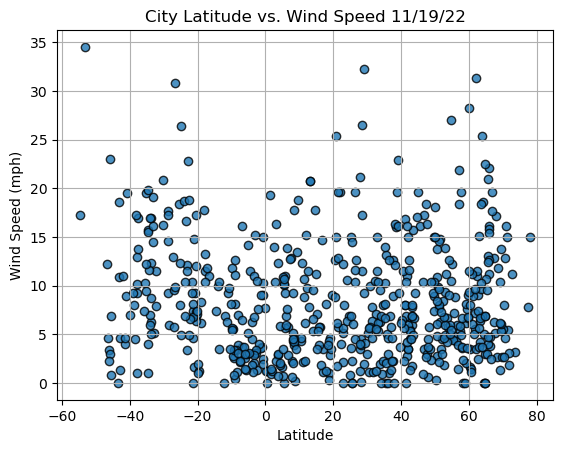

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
index13 = city_data_df.loc[13]

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

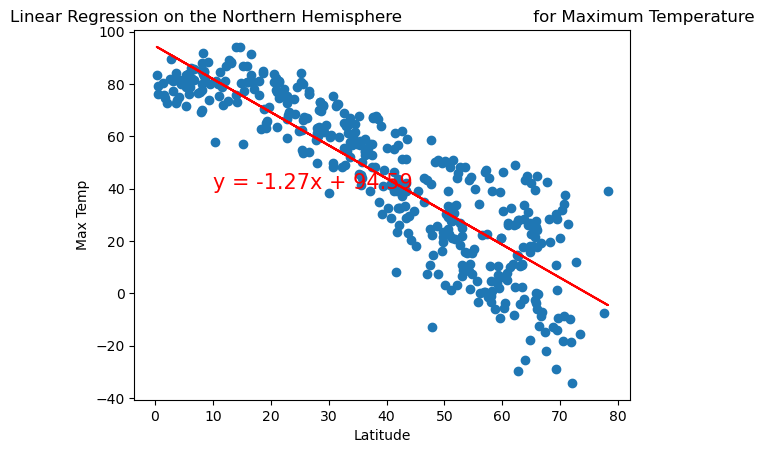

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

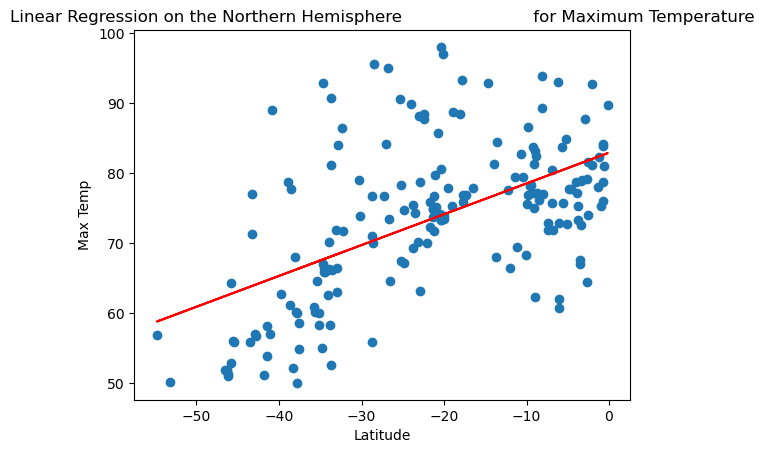

In [23]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

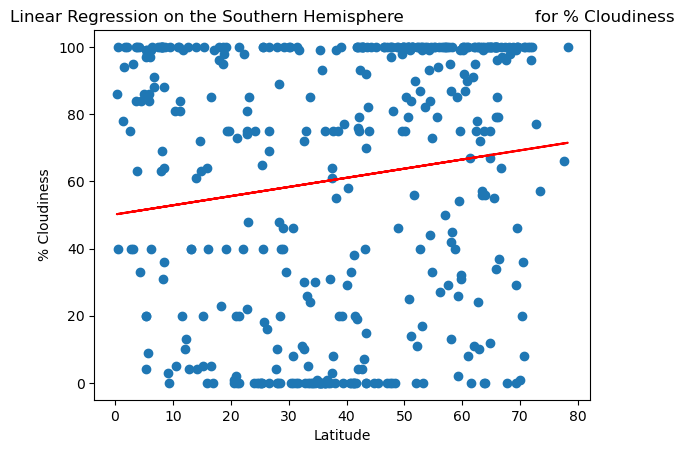

In [24]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

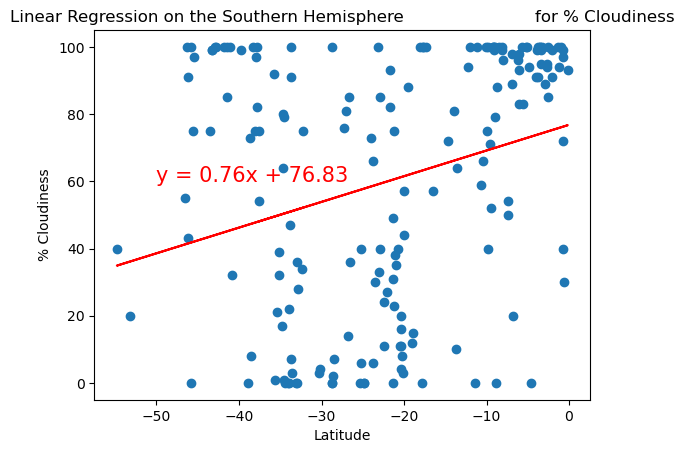

In [25]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

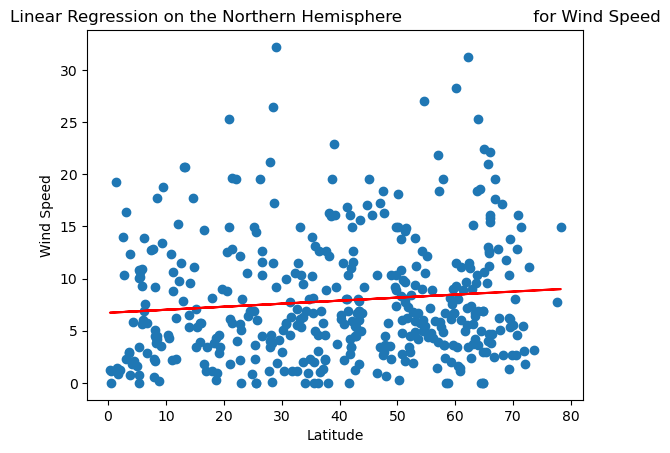

In [26]:
# Linear regression on the Northern Hemisphere for wind
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

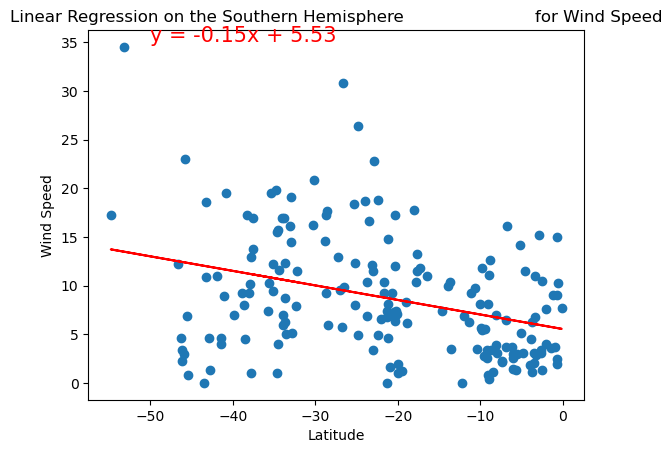

In [27]:
# Linear regression on the Southern Hemisphere for wind
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [29]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [32]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-11-19 16:07:54,3.0707,172.7902,81.16,74,95,16.37
5,Sao Joao Da Barra,BR,2022-11-19 16:07:56,-21.6403,-41.0511,75.87,57,82,10.40
16,Atar,MR,2022-11-19 16:08:01,20.5169,-13.0499,83.82,21,1,12.59
17,Sola,VU,2022-11-19 16:08:01,-13.8833,167.5500,81.32,73,81,9.95
21,Port Moresby,PG,2022-11-19 16:08:04,-9.4431,147.1797,78.24,89,52,5.59
22,Afua,BR,2022-11-19 16:08:04,-0.1567,-50.3867,89.69,51,93,7.72
25,Varkkallai,IN,2022-11-19 16:08:05,8.7341,76.7067,82.18,79,100,0.16
26,Anloga,GH,2022-11-19 16:08:06,5.7947,0.8973,83.98,67,9,10.96
27,Talara,PE,2022-11-19 16:08:06,-4.5772,-81.2719,77.76,61,0,11.50
37,Padang,ID,2022-11-19 16:08:10,-0.9492,100.3543,75.25,87,100,3.65


In [33]:
preferred_cities_df.isnull().sum()

City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [34]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Butaritari,KI,81.16,3.0707,172.7902,
5,Sao Joao Da Barra,BR,75.87,-21.6403,-41.0511,
16,Atar,MR,83.82,20.5169,-13.0499,
17,Sola,VU,81.32,-13.8833,167.5500,
21,Port Moresby,PG,78.24,-9.4431,147.1797,
22,Afua,BR,89.69,-0.1567,-50.3867,
25,Varkkallai,IN,82.18,8.7341,76.7067,
26,Anloga,GH,83.98,5.7947,0.8973,
27,Talara,PE,77.76,-4.5772,-81.2719,
37,Padang,ID,75.25,-0.9492,100.3543,
